In [1]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time 

# library for sampling
from scipy.stats import uniform

# libraries for Data Download
import datetime
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

# sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Keras
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#importing dataset with all the technical indicators
df = pd.read_csv('data_with_technical_indicators.csv')
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,0,2000-02-15,1389.939941,1407.719971,1376.250000,1402.050049,1402.050049,1.092100e+09,6.985743e+08,1.092100e+09,...,-31.857585,12.690881,1385.212323,0.713122,-0.030033,-0.003024,-0.046099,-15.888425,0.060550,0.000000
1,1,2000-02-16,1402.050049,1404.550049,1385.579956,1387.670044,1387.670044,1.018800e+09,-9.572693e+07,7.330000e+07,...,-31.857585,12.690881,1385.212323,0.713122,-0.030033,-0.003024,-0.046099,-1.025641,-1.030937,-1.025641
2,2,2000-02-17,1387.670044,1399.880005,1380.069946,1388.260010,1388.260010,1.034800e+09,-2.748931e+08,1.108100e+09,...,-31.857585,12.690881,1385.212323,0.713122,-0.030033,-0.003024,-0.046099,0.042515,0.042506,-0.983563
3,3,2000-02-18,1388.260010,1388.589966,1345.319946,1346.089966,1346.089966,1.042300e+09,-1.280096e+09,6.580000e+07,...,-31.857585,12.690881,1385.212323,0.713122,-0.030033,-0.003024,-0.046099,-3.037619,-3.084710,-3.991304
4,4,2000-02-22,1346.089966,1358.109985,1331.880005,1352.170044,1352.170044,9.800000e+08,-7.439503e+08,1.045800e+09,...,-31.857585,12.690881,1385.212323,0.713122,-0.030033,-0.003024,-0.046099,0.451684,0.450667,-3.557648


In [3]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
count,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5.283000e+03,5.283000e+03,5.283000e+03,5283.000000,...,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000
mean,2641.000000,1666.681824,1676.365469,1656.182166,1666.893109,1666.893109,3.202886e+09,6.403624e+11,4.499630e+11,0.096868,...,-38.975346,6.634421,1664.113587,0.306979,0.045246,0.045275,0.001657,0.024358,0.019545,18.889701
std,1525.215067,692.874875,695.149650,690.326403,693.007323,693.007323,1.520962e+09,5.806683e+11,4.053832e+11,0.158231,...,31.418318,53.385597,688.621473,3.678498,4.254838,3.477009,2.192509,1.269338,1.252377,49.428144
min,0.000000,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08,-9.059144e+09,-6.618743e+10,-0.361312,...,-100.000000,-634.264448,722.852625,-26.363212,-27.036779,-19.384396,-10.994445,-15.888425,-12.765220,-51.747084
25%,1320.500000,1163.534973,1172.744995,1154.779968,1163.349976,1163.349976,1.800145e+09,7.489394e+10,2.528582e+10,-0.015339,...,-66.652459,-15.263786,1168.168171,-1.352110,-2.366536,-2.045640,-1.261917,-0.473077,-0.473490,-17.025075
50%,2641.000000,1386.949951,1396.130005,1376.250000,1387.020020,1387.020020,3.301270e+09,4.978695e+11,3.744913e+11,0.084672,...,-31.857585,12.690881,1385.212323,0.713122,-0.030033,-0.003024,-0.046099,0.060262,0.060550,-1.072004
75%,3961.500000,2079.515014,2087.275024,2068.665039,2079.630004,2079.630004,4.034955e+09,1.141061e+12,8.143255e+11,0.203111,...,-9.972701,32.979248,2075.190741,2.304401,2.427669,1.960376,1.267442,0.581900,0.580213,48.327801
max,5282.000000,3920.780029,3937.229980,3905.780029,3934.830078,3934.830078,1.145623e+10,1.779247e+12,1.293432e+12,0.600581,...,-0.000000,235.030289,3863.072297,22.909632,19.621538,16.148838,10.826217,11.580037,10.957197,180.648332


In [4]:
df.isnull().sum()

Unnamed: 0             0
Date                   0
Open                   0
High                   0
Low                    0
                      ..
momentum_ppo_signal    0
momentum_ppo_hist      0
others_dr              0
others_dlr             0
others_cr              0
Length: 91, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 91 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5283 non-null   int64  
 1   Date                       5283 non-null   object 
 2   Open                       5283 non-null   float64
 3   High                       5283 non-null   float64
 4   Low                        5283 non-null   float64
 5   Close                      5283 non-null   float64
 6   Adj Close                  5283 non-null   float64
 7   Volume                     5283 non-null   float64
 8   volume_adi                 5283 non-null   float64
 9   volume_obv                 5283 non-null   float64
 10  volume_cmf                 5283 non-null   float64
 11  volume_fi                  5283 non-null   float64
 12  volume_mfi                 5283 non-null   float64
 13  volume_em                  5283 non-null   float

In [6]:
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d")

In [7]:
X = df.drop(['Close','Adj Close'], axis =1)

In [8]:
y = df['Close']

In [9]:
X.shape

(5283, 89)

In [10]:
y.shape

(5283,)

In [11]:
#splitting into 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=361)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)



# Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
model=RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1, warm_start=True)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

model.score(X_train,y_train)

0.9999974741333948

In [15]:
import sklearn.metrics as m

mae=m.mean_absolute_error(y_test,y_pred)
print(mae)

mse=np.sqrt(m.mean_squared_error(y_test,y_pred))
print(mse)

0.9695723220435121
2.77579324307928


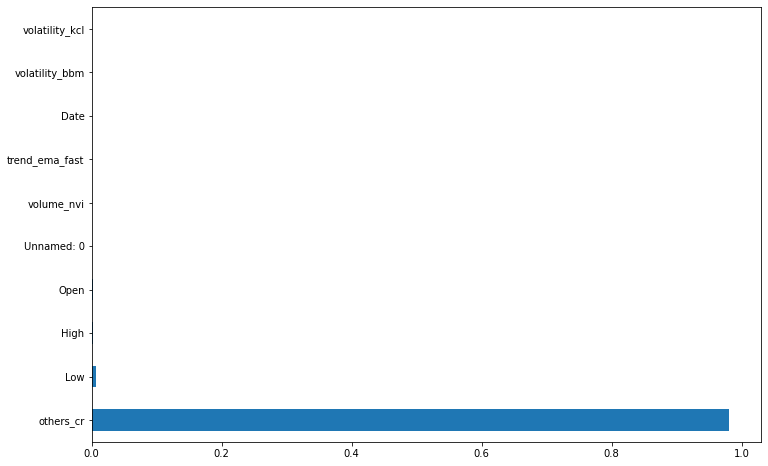

In [16]:
#top 20 features 
plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# XGboost Regressor

In [17]:
from xgboost import XGBRegressor
xgbooster=XGBRegressor(max_depth=15)

xgbooster.fit(X_train,y_train)

y_pred=xgbooster.predict(X_test)

train_score=xgbooster.score(X_train,y_train)
print(train_score)

test_score=xgbooster.score(X_test,y_test)
print(test_score)


0.9999999999994958
0.9998633938266198


In [18]:
mae=m.mean_absolute_error(y_test,y_pred)
print(mae)

mse=np.sqrt(m.mean_squared_error(y_test,y_pred))
print(mse)

3.9582673666664214
8.143897163844466


# Extra Tree Regressor

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [20]:
print(selection.feature_importances_)

[7.77927406e-03 1.56971406e-03 6.91604903e-02 3.50018851e-02
 5.42654454e-02 2.54224423e-06 4.19512525e-02 1.70784849e-02
 1.00314915e-06 1.57289854e-05 2.06433250e-06 2.34196798e-06
 3.79824645e-06 2.87361829e-06 1.66427272e-02 2.72086207e-02
 1.40188497e-06 1.60278842e-02 3.49318751e-02 4.80847651e-02
 1.04443617e-05 4.23499511e-06 1.89338191e-07 1.96241803e-06
 7.40517744e-02 3.18547174e-02 7.21184220e-02 1.76819165e-06
 5.25490106e-06 2.18920261e-06 6.91589055e-06 2.47920944e-02
 1.32766150e-02 3.04449490e-02 1.10793193e-05 5.13344533e-06
 4.82433298e-06 6.90817082e-06 4.44598508e-06 2.93442748e-06
 3.00739854e-02 1.99627295e-02 2.40840466e-02 1.56616020e-02
 1.46994151e-06 3.16693774e-06 2.39224985e-06 2.33750957e-06
 2.42274165e-06 1.63032225e-06 2.19023709e-06 1.42223956e-06
 3.35677920e-06 1.44519530e-06 1.70008073e-06 3.02799488e-06
 4.04946141e-06 4.34699859e-02 3.84308895e-02 3.99126175e-02
 2.62862955e-02 2.41008356e-02 3.91521330e-02 6.70610573e-07
 6.57782386e-07 2.927411

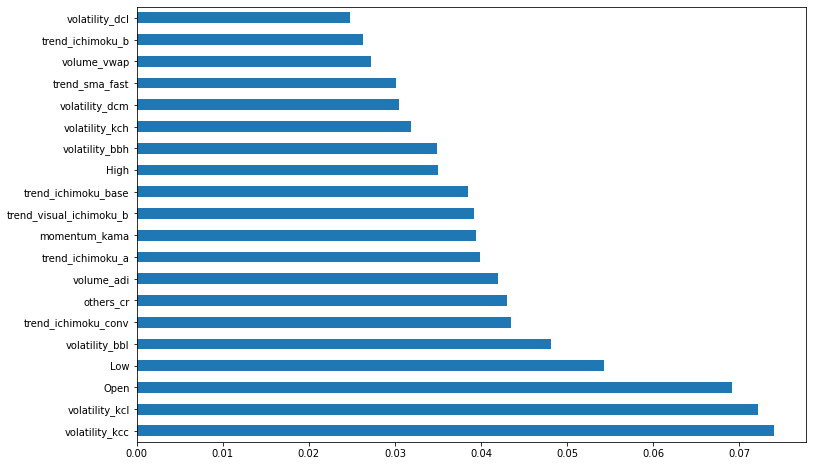

In [21]:
#top 20 features 
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Hyper parameter tuning using Randomized search CV

In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [46]:
#best parameters
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [47]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('mean_absolute_error:',mean_absolute_error(test_labels, predictions))
    return accuracy

In [48]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

Model Performance
Average Error: 0.5350 degrees.
Accuracy = 99.97%.
mean_absolute_error: 0.5350426771178519


In [49]:
test_accuracy=evaluate(base_model,X_test,y_test)

Model Performance
Average Error: 1.2062 degrees.
Accuracy = 99.94%.
mean_absolute_error: 1.2061660821192035


In [50]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)

Model Performance
Average Error: 0.3410 degrees.
Accuracy = 99.98%.
mean_absolute_error: 0.3410421017323197


In [51]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.9104 degrees.
Accuracy = 99.95%.
mean_absolute_error: 0.9104361734598916


In [52]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.02%.


# Hyper parameter tuning using  Grid search CV

In [53]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [54]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Model Performance
Average Error: 4.0715 degrees.
Accuracy = 99.75%.
mean_absolute_error: 4.071490775829728


In [55]:
test_acc=evaluate(best_grid,X_test,y_test)

Model Performance
Average Error: 6.2494 degrees.
Accuracy = 99.61%.
mean_absolute_error: 6.2493640014806395


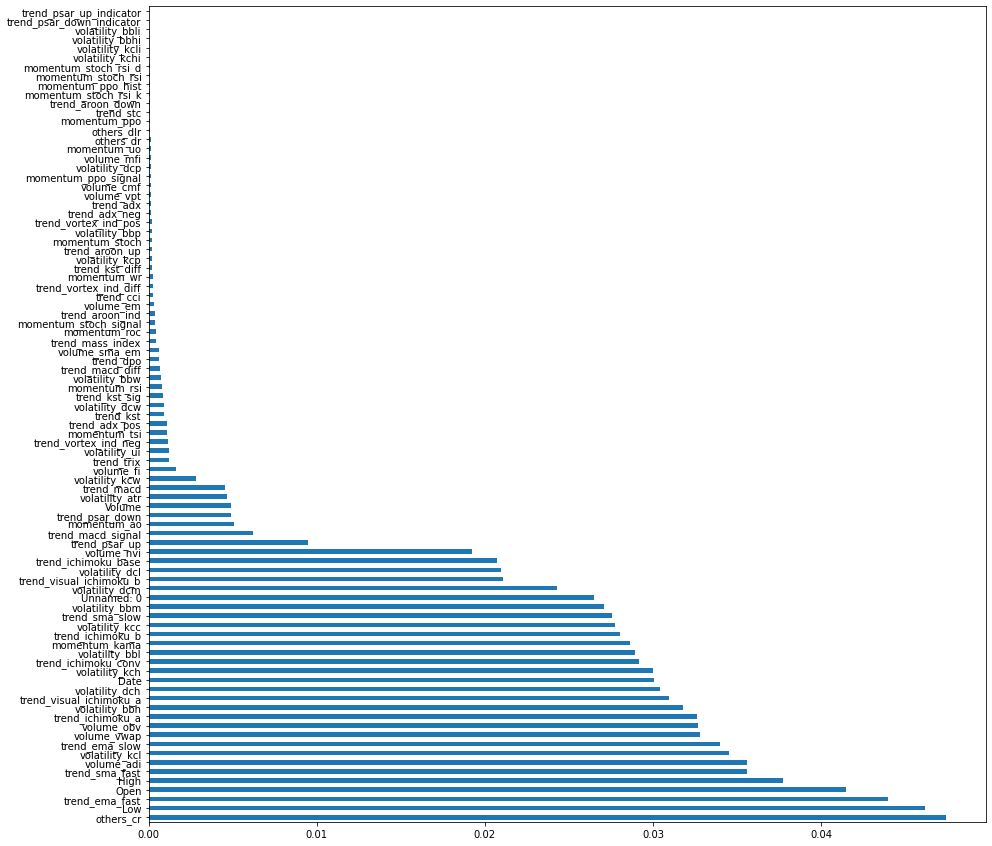

In [56]:
#top  features 
plt.figure(figsize = (15,15))
feat_importances = pd.Series(best_grid.feature_importances_, index=X.columns)
feat_importances.nlargest(89).plot(kind='barh')
plt.show()

In [57]:
# Get numerical feature importances
importances = list(best_grid.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Low                  Importance: 0.05
Variable: others_cr            Importance: 0.05
Variable: Open                 Importance: 0.04
Variable: High                 Importance: 0.04
Variable: volume_adi           Importance: 0.04
Variable: trend_sma_fast       Importance: 0.04
Variable: trend_ema_fast       Importance: 0.04
Variable: Unnamed: 0           Importance: 0.03
Variable: Date                 Importance: 0.03
Variable: volume_obv           Importance: 0.03
Variable: volume_vwap          Importance: 0.03
Variable: volatility_bbm       Importance: 0.03
Variable: volatility_bbh       Importance: 0.03
Variable: volatility_bbl       Importance: 0.03
Variable: volatility_kcc       Importance: 0.03
Variable: volatility_kch       Importance: 0.03
Variable: volatility_kcl       Importance: 0.03
Variable: volatility_dch       Importance: 0.03
Variable: trend_sma_slow       Importance: 0.03
Variable: trend_ema_slow       Importance: 0.03
Variable: trend_ichimoku_conv  Importanc